# PreProcessing

### Imports and Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Data loading
spotify_song_data= pd.read_csv("./song_data.csv")
spotify_song_info= pd.read_csv("./song_info.csv")
song_data=spotify_song_data.copy()
song_info=spotify_song_info.copy()
song_data.head(10)


,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
5,Bring Me To Life,80,235893,0.008950,0.316,0.945,0.000002,4,0.3960,-3.169,0,0.1240,189.931,4,0.320
6,Last Resort,81,199893,0.000504,0.581,0.887,0.001110,4,0.2680,-3.659,0,0.0624,90.578,4,0.724
7,Are You Gonna Be My Girl,76,213800,0.001480,0.613,0.953,0.000582,2,0.1520,-3.435,1,0.0855,105.046,4,0.537
8,Mr. Brightside,80,222586,0.001080,0.330,0.936,0.000000,1,0.0926,-3.660,1,0.0917,148.112,4,0.234
9,Sex on Fire,81,203346,0.001720,0.542,0.905,0.010400,9,0.1360,-5.653,1,0.0540,153.398,4,0.374


In [3]:
print(song_data.shape)

(18835, 15)


### Data Cleaning

In [4]:
song_data.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [5]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [6]:
song_data.song_duration_ms= song_data.song_duration_ms.astype(float)
song_data.time_signature= song_data.time_signature.astype(float)
song_data.audio_mode= song_data.audio_mode.astype(float)
song_data.key= song_data.key.astype(float)
song_data.song_popularity= song_data.song_popularity.astype(float)
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  float64
 2   song_duration_ms  18835 non-null  float64
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  float64
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  float64
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  float64
 14  audio_valence     18835 non-null  float64
dtypes: float64(14), object(1)
memory usage: 2.2+ MB


In [7]:
# Detecting outliers using the box plot method
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        Q1 = np.percentile(df[c],25)
        Q3 = np.percentile(df[c],75)
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2) 
    
    return multiple_outliers

In [8]:
song_data.loc[detect_outliers(song_data,["song_popularity","song_duration_ms","danceability","energy","instrumentalness","liveness","loudness","speechiness","audio_valence"])]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
232,La Maza,58.0,351400.0,0.6520,0.555,0.331,0.000012,9.0,0.235,-17.718,0.0,0.2700,170.603,3.0,0.437
253,Whole Lotta Love,77.0,333893.0,0.0484,0.412,0.902,0.131000,9.0,0.405,-11.600,1.0,0.4050,89.740,4.0,0.422
501,Do You Feel Like We Do,48.0,836666.0,0.0439,0.295,0.568,0.011700,0.0,0.977,-8.232,1.0,0.0284,98.284,4.0,0.384
981,The Times They Are A-Changin' - Live at Sony M...,49.0,348560.0,0.6300,0.393,0.416,0.007910,9.0,0.986,-13.243,1.0,0.0401,163.604,3.0,0.512
1113,November Rain,38.0,537506.0,0.0165,0.197,0.629,0.279000,11.0,0.125,-9.291,1.0,0.0300,79.495,4.0,0.221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15247,I Know You So Well,8.0,102661.0,0.9230,0.679,0.311,0.721000,0.0,0.813,-16.557,0.0,0.1050,60.724,4.0,0.304
16642,same stars,46.0,116918.0,0.2510,0.687,0.284,0.862000,0.0,0.496,-19.504,1.0,0.0378,115.996,4.0,0.159
17723,Dutch Spring,0.0,205623.0,0.1960,0.510,0.843,0.135000,6.0,0.569,-4.958,0.0,0.3910,83.355,4.0,0.832
3720,Racism And Injustice,21.0,260160.0,0.9220,0.650,0.316,0.000000,9.0,0.739,-18.244,0.0,0.9400,117.198,4.0,0.306


In [9]:
# Deleting Outliers
spotify_song_data = spotify_song_data.drop(detect_outliers(spotify_song_data,["song_popularity","song_duration_ms","danceability","energy","instrumentalness","liveness","loudness","speechiness","audio_valence"]),axis = 0).reset_index(drop = True)
song_data = song_data.drop(detect_outliers(song_data,["song_popularity","song_duration_ms","danceability","energy","instrumentalness","liveness","loudness","speechiness","audio_valence"]),axis = 0).reset_index(drop = True)

In [10]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18510 entries, 0 to 18509
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18510 non-null  object 
 1   song_popularity   18510 non-null  float64
 2   song_duration_ms  18510 non-null  float64
 3   acousticness      18510 non-null  float64
 4   danceability      18510 non-null  float64
 5   energy            18510 non-null  float64
 6   instrumentalness  18510 non-null  float64
 7   key               18510 non-null  float64
 8   liveness          18510 non-null  float64
 9   loudness          18510 non-null  float64
 10  audio_mode        18510 non-null  float64
 11  speechiness       18510 non-null  float64
 12  tempo             18510 non-null  float64
 13  time_signature    18510 non-null  float64
 14  audio_valence     18510 non-null  float64
dtypes: float64(14), object(1)
memory usage: 2.1+ MB


### Data Preprocessing and Visualization

In [11]:
# defining the popularity parameter as 70% and labelling songs as Hit or Flop
song_data["popularity"]= [ 1 if i>=70 else 0 for i in song_data.song_popularity ]
spotify_song_data["popularity"]= [ 1 if i>=70 else 0 for i in spotify_song_data.song_popularity ]
song_data["popularity"].value_counts()

0    14075
1     4435
Name: popularity, dtype: int64

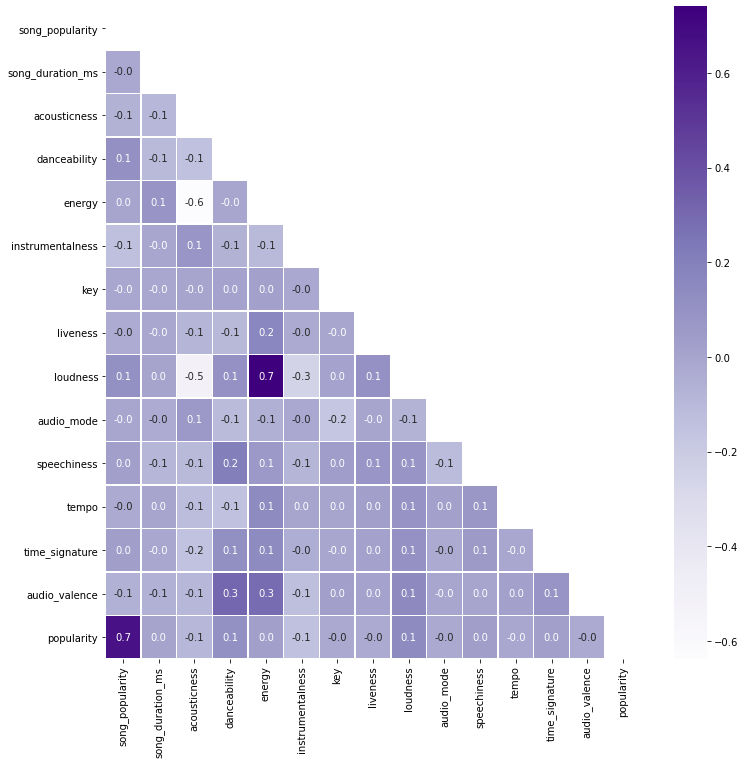

In [12]:
# Checking the correlation amoung the features.
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(song_data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(song_data.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Purples",mask=mask)
plt.show() 

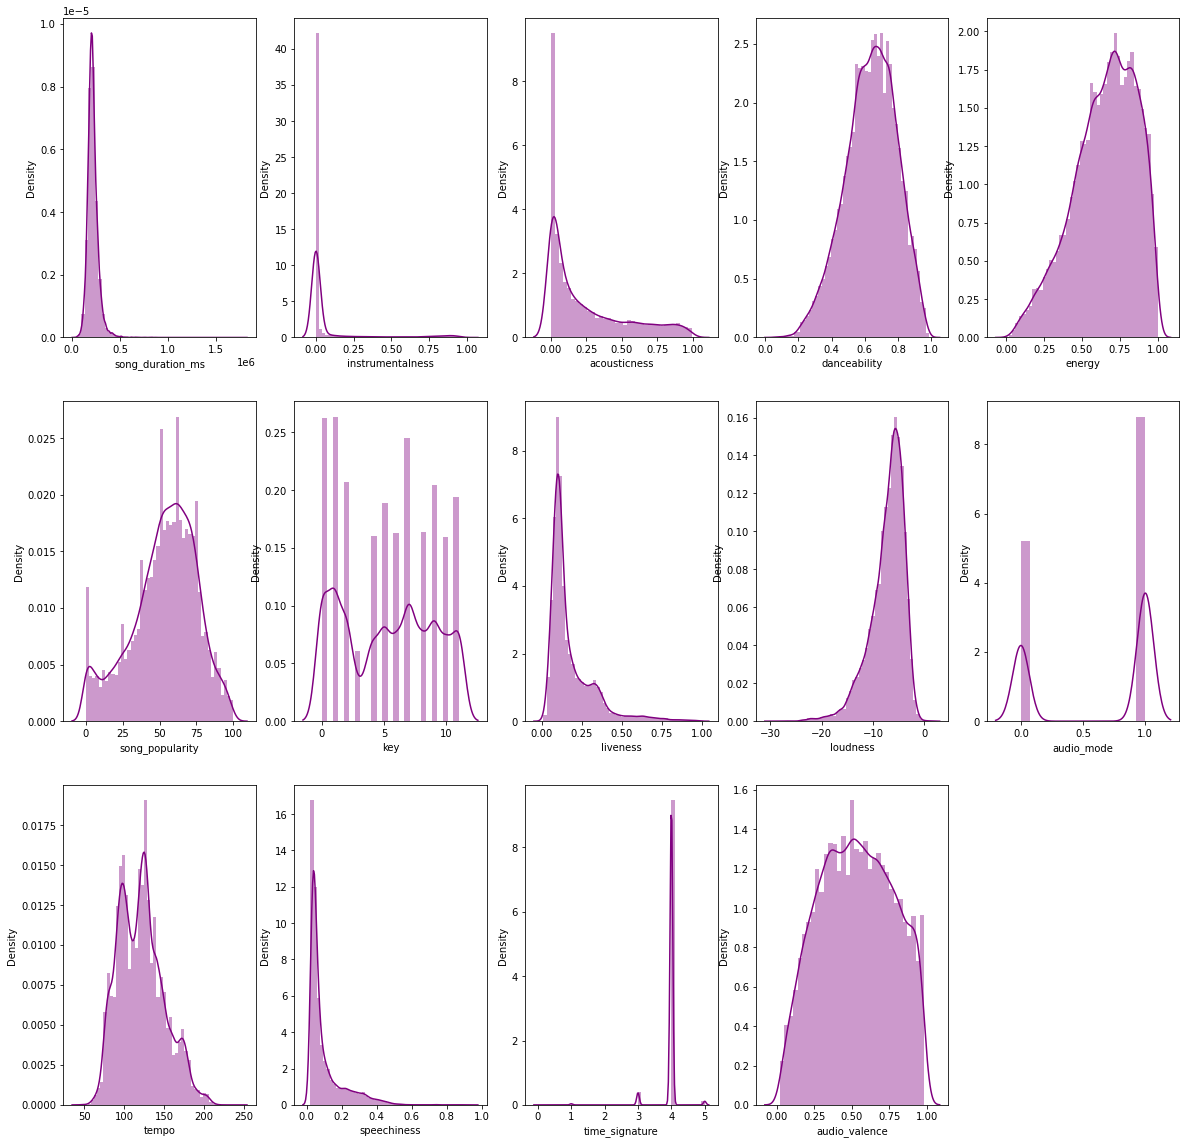

In [13]:
# Visualzation of data distribution.
f, axes = plt.subplots(3, 5, figsize=(20, 20))
sns.distplot( song_data["song_duration_ms"] , color="purple", ax=axes[0, 0])
sns.distplot( song_data["instrumentalness"] , color="purple", ax=axes[0, 1])
sns.distplot( song_data["acousticness"] , color="purple", ax=axes[0, 2])
sns.distplot( song_data["danceability"] , color="purple", ax=axes[0, 3])
sns.distplot( song_data["energy"] , color="purple", ax=axes[0, 4])
sns.distplot( song_data["song_popularity"] , color="purple", ax=axes[1, 0])
sns.distplot( song_data["key"] , color="purple", ax=axes[1, 1])
sns.distplot( song_data["liveness"] , color="purple", ax=axes[1, 2])
sns.distplot( song_data["loudness"] , color="purple", ax=axes[1, 3])
sns.distplot( song_data["audio_mode"] , color="purple", ax=axes[1, 4])
sns.distplot( song_data["tempo"] , color="purple", ax=axes[2, 0])
sns.distplot( song_data["speechiness"] , color="purple", ax=axes[2, 1])
sns.distplot( song_data["time_signature"] , color="purple", ax=axes[2, 2])
sns.distplot( song_data["audio_valence"] , color="purple", ax=axes[2, 3])
f.delaxes(axes[2][4])
plt.show()

In [14]:
data_plr = pd.concat([spotify_song_data.popularity,spotify_song_data.song_name],axis=1)

In [15]:
!pip install textblob

In [16]:
from textblob import TextBlob
data_plr['sentiment'] = data_plr['song_name'].map(lambda text: TextBlob(text).sentiment.polarity)

import numpy as np
cut = pd.cut(
    data_plr['sentiment'],
    [-np.inf, -.01, .01, np.inf],
    labels=['negative', 'neutral', 'positive']
)
data_plr['polarity'] = cut.values

song_data =pd.concat([song_data,data_plr.sentiment],axis=1)
song_data.head(3)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity,sentiment
0,Boulevard of Broken Dreams,73.0,262333.0,0.00552,0.496,0.682,0.000029,8.0,0.0589,-4.095,1.0,0.0294,167.060,4.0,0.474,1,-0.4
1,In The End,66.0,216933.0,0.01030,0.542,0.853,0.000000,3.0,0.1080,-6.407,0.0,0.0498,105.256,4.0,0.370,0,0.0
2,Seven Nation Army,76.0,231733.0,0.00817,0.737,0.463,0.447000,0.0,0.2550,-7.828,1.0,0.0792,123.881,4.0,0.324,1,0.0


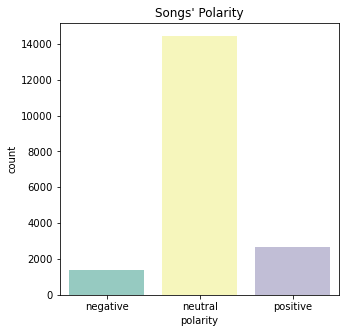

In [17]:
plt.figure(figsize=(5,5))
data= data_plr.polarity
g = sns.countplot(data, palette="Set3")
plt.title("Songs' Polarity")
plt.show()

In [18]:
# Droping the unnecessary columns and replacing the nan values by mean
song_data.drop(["song_popularity","song_name"],axis=1,inplace=True)

song_data['song_duration_ms'] = song_data['song_duration_ms'].fillna(np.mean(song_data['song_duration_ms']))
song_data['acousticness'] = song_data['acousticness'].fillna(np.mean(song_data['acousticness']))
song_data['danceability'] = song_data['danceability'].fillna(np.mean(song_data['danceability']))
song_data['energy'] = song_data['energy'].fillna(np.mean(song_data['energy']))
song_data['instrumentalness'] = song_data['instrumentalness'].fillna(np.mean(song_data['instrumentalness']))
song_data['liveness'] = song_data['liveness'].fillna(np.mean(song_data['liveness']))
song_data['loudness'] = song_data['loudness'].fillna(np.mean(song_data['loudness']))
song_data['speechiness'] = song_data['speechiness'].fillna(np.mean(song_data['speechiness']))
song_data['tempo'] = song_data['tempo'].fillna(np.mean(song_data['tempo']))
song_data['audio_valence'] = song_data['audio_valence'].fillna(np.mean(song_data['audio_valence']))
song_data['popularity'] = song_data['popularity'].fillna(np.mean(song_data['popularity']))

In [19]:
from sklearn.model_selection import train_test_split
x,y = song_data.loc[:,song_data.columns != 'popularity'], song_data.loc[:,'popularity']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
y=y.astype(int)
y_train= y_train.astype(int)
y_test= y_test.astype(int)

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (14808, 14)
x_test:  (3702, 14)
y_train:  (14808,)
y_test:  (3702,)


# Models

## KNN

In [20]:
# KNN Testing
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=3) train accuracy is: ',knn.score(x_train,y_train))
print('With KNN (K=3) test accuracy is: ',knn.score(x_test,y_test))

With KNN (K=3) train accuracy is:  0.8946515397082658
With KNN (K=3) test accuracy is:  0.7871420853592652


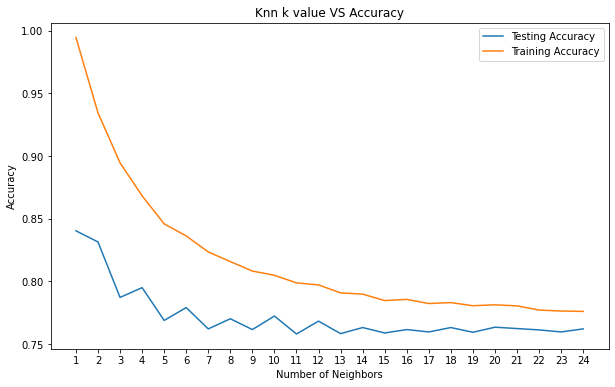

Best accuracy is 0.8403565640194489 with K = 1


In [21]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

plt.figure(figsize=[10,6])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Knn k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()

knn_accuracy = np.max(test_accuracy)
print("Best accuracy is {} with K = {}".format(knn_accuracy, 1+test_accuracy.index(np.max(test_accuracy))))

## SVM

In [22]:
from sklearn.svm import SVC
svm= SVC()
svm.fit(x_train,y_train)
print("Train accuracy of svm algo:",svm.score(x_train,y_train))
print("Test accuracy of svm algo:",svm.score(x_test,y_test))

svm_accuracy = svm.score(x_test,y_test)

Train accuracy of svm algo: 0.7606699081577526
Test accuracy of svm algo: 0.7593192868719612


In [23]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(svm,x_train,y_train,cv=k) 
cv_result_svm= np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.7602971  0.7602971  0.7602971  0.7602971  0.76097232 0.76097232
 0.76097232 0.76097232 0.76081081 0.76081081]
Cross_val scores average:  0.7606699271857948


## Decision Tree Classifier

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print("Train ccuracy of decision tree:",dt.score(x_train,y_train))
print("Test accuracy of decision tree:",dt.score(x_test,y_test))

dt_accuracy = dt.score(x_test,y_test)

Train ccuracy of decision tree: 0.9954754186925986
Test accuracy of decision tree: 0.8438681793625068


In [25]:
from sklearn.model_selection import cross_val_score
k =10
cv_result = cross_val_score(dt,x_train,y_train,cv=k) # uses R^2 as score 
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.83051992 0.83119514 0.83457124 0.83457124 0.82376772 0.83794733
 0.80148548 0.83794733 0.81824324 0.84121622]
Cross_val scores average:  0.829146486121503


<AxesSubplot:>

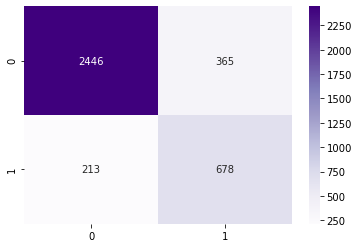

In [26]:
temp = confusion_matrix(y_test, y_pred)
sns.heatmap(temp, annot=True, fmt='', cmap="Purples")

## Random Forest Classifer

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=150,random_state = 3)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("Train accuracy of random forest",rf.score(x_train,y_train))
print("Test accuracy of random forest",rf.score(x_test,y_test))
rf_accuracy=rf.score(x_test,y_test)

Train accuracy of random forest 0.9954754186925986
Test accuracy of random forest 0.9208535926526202


In [28]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(rf,x_train,y_train,cv=k) # uses R^2 as score 
cv_result_randomforest=np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.91897367 0.91289669 0.91694801 0.91222147 0.91289669 0.90546928
 0.89264011 0.91357191 0.90202703 0.92027027]
Cross_val scores average:  0.9107915123090681


<AxesSubplot:>

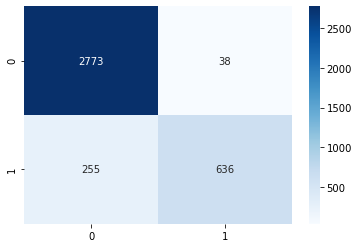

In [29]:
temp = confusion_matrix(y_test, y_pred)
sns.heatmap(temp, annot=True, fmt='', cmap="Blues")

# Results

In [30]:
print("Decision Tree Classifier Accuarcy:", dt_accuracy)
print("Random Forest Classifier Accuarcy:", rf_accuracy)
print("SVM Accuarcy:", svm_accuracy)
print("KNN Accuarcy:", knn_accuracy)

Decision Tree Classifier Accuarcy: 0.8438681793625068
Random Forest Classifier Accuarcy: 0.9208535926526202
SVM Accuarcy: 0.7593192868719612
KNN Accuarcy: 0.8403565640194489
